# *Clean modeling*

**Author:** [Kata Ferenc](https://github.com/ferenckata) ([k.t.ferenc@ncmm.uio.no](mailto:k.t.ferenc@ncmm.uio.no))

**Achievement:** *Using three different machine learning models predicting diabetes from health data*

## Introduction

*Using the Kaggle dataset [Diabetes Health Indicators](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset) we trained machine learning models to predict diabetes from health indicators.*

# Reproducibility and code formatting

In [1]:
# To watermark the environment
%load_ext watermark

# For automatic code formatting in jupyter lab.
%load_ext lab_black

# For automatic code formatting in jupyter notebook
%load_ext nb_black

# For better logging
%load_ext rich

# Analysis

In [2]:
# Imports
# -------

# System
import sys

# Logging
import logging

# Rich logging in jupyter
from rich.logging import RichHandler

FORMAT = "%(message)s"
logging.basicConfig(
    level="INFO", format=FORMAT, datefmt="[%X]", handlers=[RichHandler()]
)

log = logging.getLogger("rich")

# Nice logging example:
# log.error("[bold red blink]Server is shutting down![/]", extra={"markup": True})


# Other packages
# Data processing
import pandas as pd

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Custom functions from module
import src.model_utils

Selecting a few features that we think might be useful

In [3]:
datapath = "../data/train/diabetes_binary_train.csv.zip"
data_in = pd.read_csv(datapath)

In [4]:
features_of_interest = ["Diabetes_binary", "Age", "BMI", "Sex", "HighBP", "HighChol"]
X_train, X_valid, y_train, y_valid = model_utils.prepare_data(
    data_in, features_of_interest, "Diabetes_binary", 0.2
)

The accuracy on the validation data is 0.71


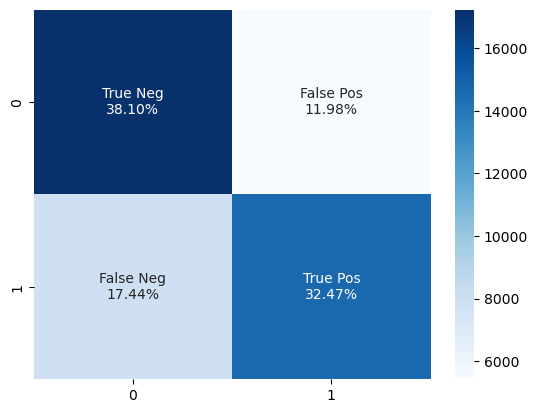

In [5]:
svm_model = SVC(kernel="poly", degree=5, random_state=42)
fitted_svm_model = model_utils.train_eval_model(svm_model, X_train, y_train)

The accuracy on the validation data is 0.70


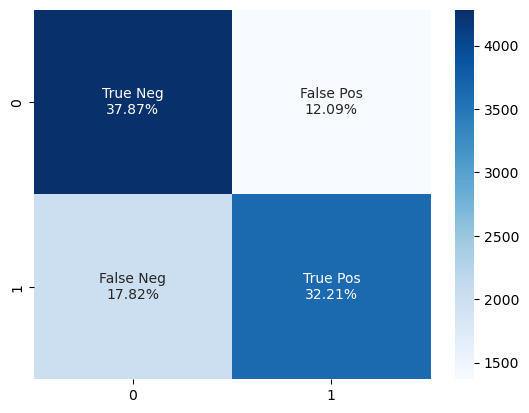

In [6]:
model_utils.test_eval_model(fitted_svm_model, X_valid, y_valid)

Maybe we can make the model better by providing all features to learn from.

In [7]:
features_of_interest = data_in.columns
X_train, X_valid, y_train, y_valid = model_utils.prepare_data(
    data_in, features_of_interest, "Diabetes_binary", 0.2
)

Furthermore, we can train an even more flexible model.

The accuracy on the validation data is 0.75


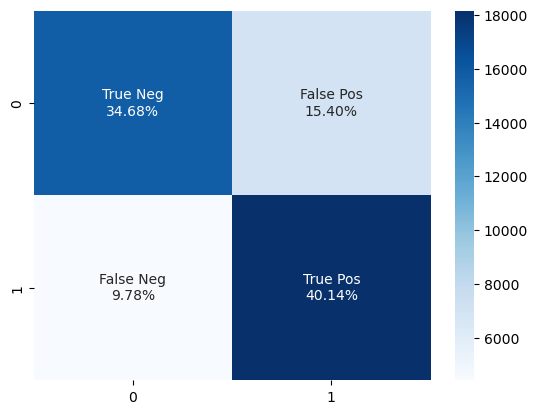

In [8]:
svm_model = SVC(kernel="rbf", gamma="scale", random_state=42)
fitted_svm_model = model_utils.train_eval_model(svm_model, X_train, y_train)

A more flexible model might cause reduced validation accuracy

The accuracy on the validation data is 0.75


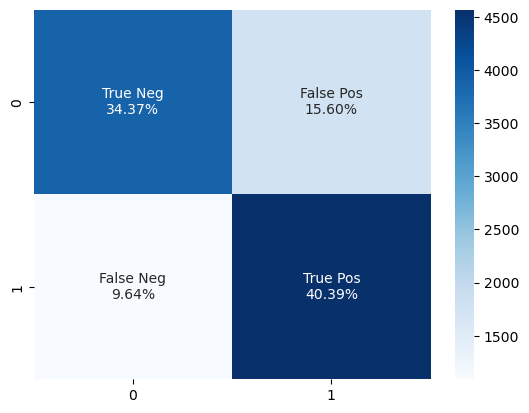

In [9]:
model_utils.test_eval_model(fitted_svm_model, X_valid, y_valid)

Incuding more features did not make the model much better. Feature engineering would let us know which features are most important.

# Watermark

This should be the last section of your notebook, since it watermarks all your environment.

When commiting this notebook, remember to restart the kernel, rerun the notebook and run this cell last, to watermark the environment.

In [11]:
%watermark -gb -iv -m -v

Python implementation: CPython
Python version       : 3.8.13
IPython version      : 7.31.1

Compiler    : GCC 10.3.0
OS          : Linux
Release     : 5.19.8-200.fc36.x86_64
Machine     : x86_64
Processor   : x86_64
CPU cores   : 12
Architecture: 64bit

Git hash: 2a7c0366711d0cf8dbccf6b5bee9ce0e7375c79d

Git branch: organize

pandas : 1.4.3
sys    : 3.8.13 | packaged by conda-forge | (default, Mar 25 2022, 06:04:10) 
[GCC 10.3.0]
logging: 0.5.1.2

